In [1]:
import pandas as pd
dfaccount = pd.read_csv('https://query.data.world/s/eenobtmnk5ducuuwriagjx3zj6ee4z',  sep=';')

In [2]:
dfclient = pd.read_csv('https://query.data.world/s/y52ecnrj755lglbpcq7ohwjzdhvtg7',  sep=';')

In [3]:
dfdisp = pd.read_csv('https://query.data.world/s/udbqns7mfu77msmw4jh5bdemrbwdkq',  sep=';')

In [4]:
dftrans = pd.read_csv('https://query.data.world/s/ehw6znxqznfmrojmgyzobje55regbd',  sep=';')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
dfaccount.head()

,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101
2,704,55,POPLATEK MESICNE,930101
3,2378,16,POPLATEK MESICNE,930101
4,2632,24,POPLATEK MESICNE,930102


In [6]:
len(dfaccount)

4500

In [7]:
dfclient

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5
...,...,...,...
5364,13955,456030,1
5365,13956,430406,1
5366,13968,680413,61
5367,13971,626019,67


In [8]:
dfdisp

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT
...,...,...,...,...
5364,13647,13955,11349,OWNER
5365,13648,13956,11349,DISPONENT
5366,13660,13968,11359,OWNER
5367,13663,13971,11362,OWNER


In [9]:
dftrans

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1056315,3626622,2906,981231,PRIJEM,NaN,62.3,13729.4,UROK,NaN,NaN
1056316,3627616,2935,981231,PRIJEM,NaN,81.3,19544.9,UROK,NaN,NaN
1056317,3625403,2869,981231,PRIJEM,NaN,60.2,14638.2,UROK,NaN,NaN
1056318,3626683,2907,981231,PRIJEM,NaN,107.5,23453.0,UROK,NaN,NaN


In [10]:
df_trans_disp = dftrans.merge(dfdisp, left_on='account_id', right_on='account_id', how='left', suffixes=['_trans','_disp'])

In [11]:
df_trans_disp.head()

,trans_id,account_id,date,type_trans,operation,amount,balance,k_symbol,bank,account,disp_id,client_id,type_disp
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN,2873,2873,OWNER
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,692,692,OWNER
2,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN,693,693,DISPONENT
3,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,844,844,OWNER
4,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN,845,845,DISPONENT


In [12]:
len(df_trans_disp)

1262625

In [13]:
def checkDuplicated(df, dfname):
    print(dfname)
    if df.duplicated().sum() > 0:
        print("### Is duplicated {} ###".format(dfname))
        
        

In [14]:
for each, name in ((dftrans,'dftrans'),( dfaccount, 'dfaccount'), (dfdisp, 'dfdisp'),(dfclient, 'dfclient'), (df_trans_disp, 'df_trans_disp')):
    checkDuplicated(each, name)

dftrans
dfaccount
dfdisp
dfclient
df_trans_disp


In [15]:
df_trans_account = dftrans.merge(dfaccount, left_on='account_id', right_on='account_id', how='left', suffixes=['_trans','_acc'])

In [16]:
df_trans_account_disp = df_trans_account.merge(dfdisp, left_on='account_id', right_on='account_id', how='left', suffixes=['_trans','_disp'])

In [17]:
len(df_trans_account_disp)

1262625

In [18]:
df_trans_account_disp_client = df_trans_account_disp.merge(dfclient, left_on='client_id', right_on='client_id', how='left', suffixes=['_trans','_client'])

In [19]:
len(df_trans_account_disp_client)

1262625

In [20]:
dfraw = df_trans_account_disp_client

In [21]:
dfraw.isnull().sum()/len(dfraw)

trans_id              0.000000
account_id            0.000000
date_trans            0.000000
type_trans            0.000000
operation             0.172902
amount                0.000000
balance               0.000000
k_symbol              0.451296
bank                  0.733849
account               0.713619
district_id_trans     0.000000
frequency             0.000000
date_acc              0.000000
disp_id               0.000000
client_id             0.000000
type_disp             0.000000
birth_number          0.000000
district_id_client    0.000000
dtype: float64

In [22]:
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262625 entries, 0 to 1262624
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   trans_id            1262625 non-null  int64  
 1   account_id          1262625 non-null  int64  
 2   date_trans          1262625 non-null  int64  
 3   type_trans          1262625 non-null  object 
 4   operation           1044314 non-null  object 
 5   amount              1262625 non-null  float64
 6   balance             1262625 non-null  float64
 7   k_symbol            692808 non-null   object 
 8   bank                336049 non-null   object 
 9   account             361592 non-null   float64
 10  district_id_trans   1262625 non-null  int64  
 11  frequency           1262625 non-null  object 
 12  date_acc            1262625 non-null  int64  
 13  disp_id             1262625 non-null  int64  
 14  client_id           1262625 non-null  int64  
 15  type_disp      

In [23]:
dfraw['bank'].fillna(value='Not_Available', inplace=True)

In [24]:
dfraw['account'].isna().any()

True

In [25]:
dfraw['bank'].isna().any()

False

In [26]:
dfraw['operation'].fillna(value='Not_Available', inplace=True)

In [27]:
dfraw['operation'].isna().any()

False

The following steps will help you complete this activity --- Steps 1-5 have been done for you in the starter file:

Download and load the different tables from this dataset into Python.
Analyze each table with the .shape and .head() methods.
Find the common/similar column(s) between tables that will be used for merging based on the analysis from Step 2.
There should be four common tables. Merge the four tables together using pd.merge().
Rename the column names after merging with .rename().
Check there is no duplication after merging with .duplicated() and .sum().
Transform the data type for date columns using .to_datetime().
Create two separate features from birth_number to get the date of birth and sex for each customer.    (NoteThis is the rule used for coding the data related to birthday and sex in this column: the number is in the YYMMDD format for men, the number is in the YYMM+50DD format for women, where YYMMDD is the date of birth. )
Fix data quality issues with .isna().
Create a new feature that will calculate customers' ages when they opened an account using date operations:
Download the datasets:

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='account', ylabel='Count'>

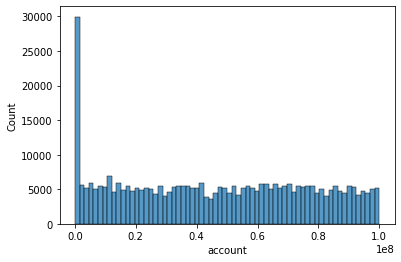

In [29]:
sns.histplot(dfraw['account'])

In [30]:
len(dfraw[dfraw.account ==0])

25543

In [31]:
dfraw['account'].fillna(value=0, inplace=True)

In [32]:
dfraw['account'].isna().any()

False

In [33]:
dfraw.isnull().sum()/len(dfraw)

trans_id              0.000000
account_id            0.000000
date_trans            0.000000
type_trans            0.000000
operation             0.000000
amount                0.000000
balance               0.000000
k_symbol              0.451296
bank                  0.000000
account               0.000000
district_id_trans     0.000000
frequency             0.000000
date_acc              0.000000
disp_id               0.000000
client_id             0.000000
type_disp             0.000000
birth_number          0.000000
district_id_client    0.000000
dtype: float64

<AxesSubplot:xlabel='k_symbol', ylabel='Count'>

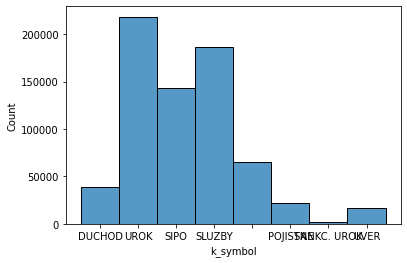

In [34]:
sns.histplot(dfraw['k_symbol'])

In [35]:
dfraw['k_symbol'].fillna(value='Not_Available', inplace=True)

In [36]:
dfraw.isnull().sum()/len(dfraw)

trans_id              0.0
account_id            0.0
date_trans            0.0
type_trans            0.0
operation             0.0
amount                0.0
balance               0.0
k_symbol              0.0
bank                  0.0
account               0.0
district_id_trans     0.0
frequency             0.0
date_acc              0.0
disp_id               0.0
client_id             0.0
type_disp             0.0
birth_number          0.0
district_id_client    0.0
dtype: float64

In [37]:
dfraw.head()

,trans_id,account_id,date_trans,type_trans,operation,amount,balance,k_symbol,bank,account,district_id_trans,frequency,date_acc,disp_id,client_id,type_disp,birth_number,district_id_client
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,Not_Available,Not_Available,0.0,16,POPLATEK MESICNE,930101,2873,2873,OWNER,755324,16
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,Not_Available,Not_Available,0.0,55,POPLATEK MESICNE,930101,692,692,OWNER,365111,74
2,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,Not_Available,Not_Available,0.0,55,POPLATEK MESICNE,930101,693,693,DISPONENT,350317,74
3,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,Not_Available,Not_Available,0.0,55,POPLATEK MESICNE,930101,844,844,OWNER,450114,22
4,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,Not_Available,Not_Available,0.0,55,POPLATEK MESICNE,930101,845,845,DISPONENT,535130,22


In [38]:
dfraw['byr'] = dfraw['birth_number'].apply(lambda x: int(str(x)[:2]))
dfraw['bmon'] = dfraw['birth_number'].apply(lambda x: int(str(x)[2:4]))
dfraw['byrTmp'] = dfraw['birth_number'].apply(lambda x: int(str(x)[4:]))

In [39]:
dfraw.head()

,trans_id,account_id,date_trans,type_trans,operation,amount,balance,k_symbol,bank,account,...,frequency,date_acc,disp_id,client_id,type_disp,birth_number,district_id_client,byr,bmon,byrTmp
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,Not_Available,Not_Available,0.0,...,POPLATEK MESICNE,930101,2873,2873,OWNER,755324,16,75,53,24
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,Not_Available,Not_Available,0.0,...,POPLATEK MESICNE,930101,692,692,OWNER,365111,74,36,51,11
2,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,Not_Available,Not_Available,0.0,...,POPLATEK MESICNE,930101,693,693,DISPONENT,350317,74,35,3,17
3,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,Not_Available,Not_Available,0.0,...,POPLATEK MESICNE,930101,844,844,OWNER,450114,22,45,1,14
4,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,Not_Available,Not_Available,0.0,...,POPLATEK MESICNE,930101,845,845,DISPONENT,535130,22,53,51,30


<AxesSubplot:xlabel='byr', ylabel='Count'>

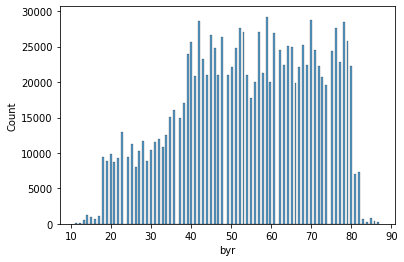

In [40]:
sns.histplot(dfraw['byr'])

<AxesSubplot:xlabel='bmon', ylabel='Count'>

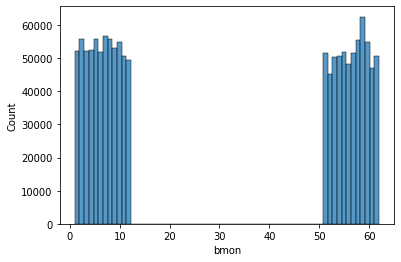

In [41]:
sns.histplot(dfraw['bmon'])

In [42]:
dfraw['gender'] = dfraw['bmon'].apply(lambda x: 1 if x < 50 else 0)

<AxesSubplot:xlabel='gender', ylabel='Count'>

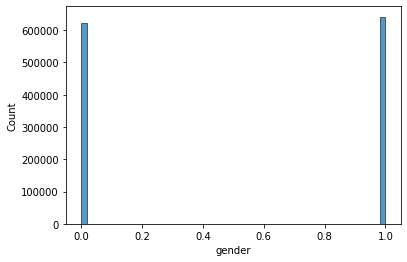

In [43]:
sns.histplot(dfraw['gender'])

In [44]:
dfraw['bmon'] = dfraw['bmon'].apply(lambda x: x if x < 50 else (x-50))

<AxesSubplot:xlabel='bmon', ylabel='Count'>

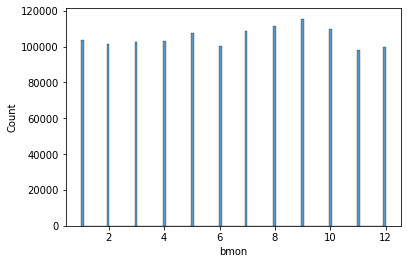

In [45]:
sns.histplot(dfraw['bmon'])

In [46]:
"""
df['age'] = (np.floor((pd.to_datetime(df['dte']) - 
             pd.to_datetime(dob)).dt.days / 365.25)).astype(int)
"""

"\ndf['age'] = (np.floor((pd.to_datetime(df['dte']) - \n             pd.to_datetime(dob)).dt.days / 365.25)).astype(int)\n"

In [47]:
dfraw['byr'] = dfraw['byr'].apply(lambda x : '19'+str(x))

In [48]:
dfraw.head()

,trans_id,account_id,date_trans,type_trans,operation,amount,balance,k_symbol,bank,account,...,date_acc,disp_id,client_id,type_disp,birth_number,district_id_client,byr,bmon,byrTmp,gender
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,Not_Available,Not_Available,0.0,...,930101,2873,2873,OWNER,755324,16,1975,3,24,0
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,Not_Available,Not_Available,0.0,...,930101,692,692,OWNER,365111,74,1936,1,11,0
2,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,Not_Available,Not_Available,0.0,...,930101,693,693,DISPONENT,350317,74,1935,3,17,1
3,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,Not_Available,Not_Available,0.0,...,930101,844,844,OWNER,450114,22,1945,1,14,1
4,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,Not_Available,Not_Available,0.0,...,930101,845,845,DISPONENT,535130,22,1953,1,30,0


In [49]:
dfraw['bmon'] = dfraw['bmon'].apply(lambda x : '0'+str(x) if len(str(x)) == 1 else str(x))

In [50]:
dfraw.head()

,trans_id,account_id,date_trans,type_trans,operation,amount,balance,k_symbol,bank,account,...,date_acc,disp_id,client_id,type_disp,birth_number,district_id_client,byr,bmon,byrTmp,gender
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,Not_Available,Not_Available,0.0,...,930101,2873,2873,OWNER,755324,16,1975,03,24,0
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,Not_Available,Not_Available,0.0,...,930101,692,692,OWNER,365111,74,1936,01,11,0
2,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,Not_Available,Not_Available,0.0,...,930101,693,693,DISPONENT,350317,74,1935,03,17,1
3,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,Not_Available,Not_Available,0.0,...,930101,844,844,OWNER,450114,22,1945,01,14,1
4,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,Not_Available,Not_Available,0.0,...,930101,845,845,DISPONENT,535130,22,1953,01,30,0
